<a href="https://colab.research.google.com/github/Nicholas-Sanso/age_classification/blob/main/EDA_weights_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model


import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import shutil
import os
import tensorflow as tf

from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.applications import EfficientNetB0

from mpl_toolkits.mplot3d import Axes3D



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Capstone/


/content/drive/MyDrive/Capstone


In [ ]:
#recall the architecture
model_layerDeep_1 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

# load weights
model_layerDeep_1.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_1.h5')

# get weights of the model
model_layerDeep_1_weights = model_layerDeep_1.get_weights()




In [ ]:
#confirms that maxpooling layers do not have weights or biasis
for i, layer in enumerate(model_layerDeep_1.layers):
    if len(layer.get_weights()) > 0:
        weights = layer.get_weights()[0]  # weights
        biases = layer.get_weights()[1]  # biases
        print(f"Layer {i+1} weights shape: {weights.shape}")
        print(f"Layer {i+1} biases shape: {biases.shape}")
    else:
        print(f"Layer {i+1} does not have weights or biases")


Layer 1 weights shape: (3, 3, 3, 2)
Layer 1 biases shape: (2,)
Layer 2 does not have weights or biases
Layer 3 weights shape: (3, 3, 2, 4)
Layer 3 biases shape: (4,)
Layer 4 does not have weights or biases
Layer 5 weights shape: (3, 3, 4, 8)
Layer 5 biases shape: (8,)
Layer 6 does not have weights or biases
Layer 7 weights shape: (3, 3, 8, 16)
Layer 7 biases shape: (16,)
Layer 8 does not have weights or biases
Layer 9 weights shape: (3, 3, 16, 16)
Layer 9 biases shape: (16,)
Layer 10 does not have weights or biases
Layer 11 weights shape: (3, 3, 16, 32)
Layer 11 biases shape: (32,)
Layer 12 does not have weights or biases
Layer 13 does not have weights or biases
Layer 14 weights shape: (32, 32)
Layer 14 biases shape: (32,)
Layer 15 weights shape: (32, 8)
Layer 15 biases shape: (8,)


In [ ]:
#recall the architecture
model_layerDeep_2 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

model_layerDeep_2.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_2.h5')
model_layerDeep_2_weights = model_layerDeep_2.get_weights()




In [ ]:
#recall the architecture
model_layerDeep_3 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

model_layerDeep_3.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_3.h5')
model_layerDeep_3_weights = model_layerDeep_3.get_weights()

In [ ]:
#recall the architecture
model_layerDeep_4 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Conv2D(8, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

model_layerDeep_4.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_4.h5')
model_layerDeep_4_weights = model_layerDeep_4.get_weights()

In [ ]:
#recall the architecture
model_layerDeep_5 = Sequential([
    Conv2D(2, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), activation='relu',),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

model_layerDeep_5.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_layerDeep_5.h5')
model_layerDeep_5_weights = model_layerDeep_5.get_weights()

In [ ]:
#recall the architecture
model_filterDeep_1 = Sequential([
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

model_filterDeep_1.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_1.h5')
model_filterDeep_1_weights = model_filterDeep_1.get_weights()

In [ ]:
#recall the architecture
model_filterDeep_2 = Sequential([
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

model_filterDeep_2.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_2.h5')
model_filterDeep_2_weights = model_filterDeep_2.get_weights()

In [ ]:
#recall the architecture
model_filterDeep_3 = Sequential([
    Conv2D(64, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

model_filterDeep_3.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_3.h5')
model_filterDeep_3_weights = model_filterDeep_3.get_weights()

In [ ]:
#recall the architecture
model_filterDeep_4 = Sequential([
    Conv2D(16, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(16, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

model_filterDeep_4.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_4.h5')
model_filterDeep_4_weights = model_filterDeep_4.get_weights()


In [ ]:
#define the architecture
model_filterDeep_5 = Sequential([
    Conv2D(4, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(4, (3, 3), strides=2, activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(8, activation='softmax')
])

model_filterDeep_5.load_weights('/content/drive/MyDrive/Capstone/model_weights/model_filterDeep_5.h5')

model_filterDeep_5_weights = model_filterDeep_5.get_weights()

In [ ]:
#assume models is your list of models
models = [model_layerDeep_1, model_layerDeep_2, model_layerDeep_3, model_layerDeep_4,model_layerDeep_5,
          model_filterDeep_1, model_filterDeep_2, model_filterDeep_3, model_filterDeep_4, model_filterDeep_5]


# initialize an empty list to store the standard deviations for each model
std_devs_all_models = []

#iterate over each model
for model in models:
    #get weights of the current model
    model_weights = model.get_weights()

    #calc standard deviation for each layer in the current model
    std_devs_current_model = [np.std(layer_weights) for layer_weights in model_weights]

    #append the standard deviations of the current model to the main list
    std_devs_all_models.append(std_devs_current_model)


In [ ]:
print(std_devs_all_models)

[[0.25832143, 0.1593031, 0.274215, 0.06635858, 0.23267888, 0.017650738, 0.179807, 0.08431724, 0.17308001, 0.159609, 0.1375696, 0.1645137, 0.21993242, 0.14242342, 0.319895, 0.089513324], [0.25384015, 0.1983768, 0.26730797, 0.049161553, 0.21107619, 0.08161268, 0.17694269, 0.097382285, 0.15340316, 0.08998327, 0.13224405, 0.12168176, 0.27638623, 0.12810273], [0.25180387, 0.1858201, 0.28942022, 0.06864138, 0.22447689, 0.10849431, 0.18595785, 0.11048643, 0.09767719, 0.08555531, 0.27447584, 0.0983352], [0.25577036, 0.24305463, 0.22428183, 0.15979473, 0.20030577, 0.15588506, 0.05524369, 0.02910723, 0.23805176, 0.26694182], [0.312795, 0.046478234, 0.3851453, 0.10160278, 0.09990199, 0.052258946, 0.3764595, 0.06448391], [0.04068851, 0.008439892, 0.0047208914, 0.002397077, 0.23005527, 0.004510686], [0.12320205, 0.1192088, 0.06414827, 0.03931849, 0.031590503, 0.045283843, 0.24169253, 0.18782829], [0.13221674, 0.13380316, 0.10065047, 0.06135366, 0.037266083, 0.023957858, 0.22987619, 0.07984278], [0.

In [ ]:
#assume models is your list of models
models = [model_layerDeep_1, model_layerDeep_2, model_layerDeep_3, model_layerDeep_4,model_layerDeep_5,
          model_filterDeep_1, model_filterDeep_2, model_filterDeep_3, model_filterDeep_4, model_filterDeep_5]

#create a list of model names
model_names = ['model_layerDeep_1', 'model_layerDeep_2', 'model_layerDeep_3', 'model_layerDeep_4','model_layerDeep_5',
               'model_filterDeep_1', 'model_filterDeep_2', 'model_filterDeep_3', 'model_filterDeep_4', 'model_filterDeep_5']

#empty list to store the standard deviations for each model
std_devs_all_models = []

#iterate over each model
for model in models:
    std_devs_current_model = []
    #iterate over each layer in the model
    for layer in model.layers:
        #check if the layer has weights (i.e., not a pooling layer)
        if len(layer.get_weights()) > 0:
            #get kernel weights of the current layer
            kernel_weights = layer.get_weights()[0]  # kernel weights

            #calc standard deviation for the current layer
            std_dev = np.std(kernel_weights)

            #append the standard deviation to the list for the current model
            std_devs_current_model.append(std_dev)

    #append the standard deviations of the current model to the main list
    std_devs_all_models.append(std_devs_current_model)


**Below is the standard deviation of the weights of all neurons in a given layer**

**The weights of the model are the magnitdue of the manipulations that are being performed on the input tensor (or input image if it's the first neuron). Thus, the standard deviation of the weights of the model are indicative of  the breadth of the transformations being performed on the input tensor.**



We can see several trends in the line graph depicting the standard deviation of the model's layers' weights:
1. In every layer, the final layer of the model (which is always a dense layer) saw a sharp increase in the standard deviation of the layer's weights. Similarly, the second to last layer, which is also a dense layer, always say a precipitious decline in the standard deviation of the layer's weights.
>The second-to-last layer (the first dense layer) is often responsible for combining the features learned by the previous convolutional layers into a higher-level representation. This layer might have a lower standard deviation of weights because it’s working with more abstract features, which might not require as large weights to capture.<br>
<br>
>The last layer of the network is responsible for making the final prediction. The weights in this layer can often be larger because they’re directly determining the output of the network. This is particulary likely if you have a  multi-class classification task, the weights in this layer are determining how much each feature contributes to the likelihood of each class.

2. With the exception of the deepest model, the standard deviation of the weights of the layer decrease with each layer until the very last layer.
> The CNN begins by capturing low-level features which are less abstract and narrow. These low-level features require higher model weights as they require more detailed modificaiton to the input image. As we move deeper into the network, the layers start to capture broader and abstract features. These weights are fine-tuning the input they receive from previous layers.


3. The deeper (more layers) the model had, the less change there was to the standard deviation of the model's weights when you remove a layer.
4. The more filters the model had, the less change there was to the standard deviation of the model's weights when you reduce the number of filters.
5. The deeper a model was, the greater the standard deviation layers' weights.
6. There was no relationship between the number of filters that the model had and the standar deviation of its layers' weights.





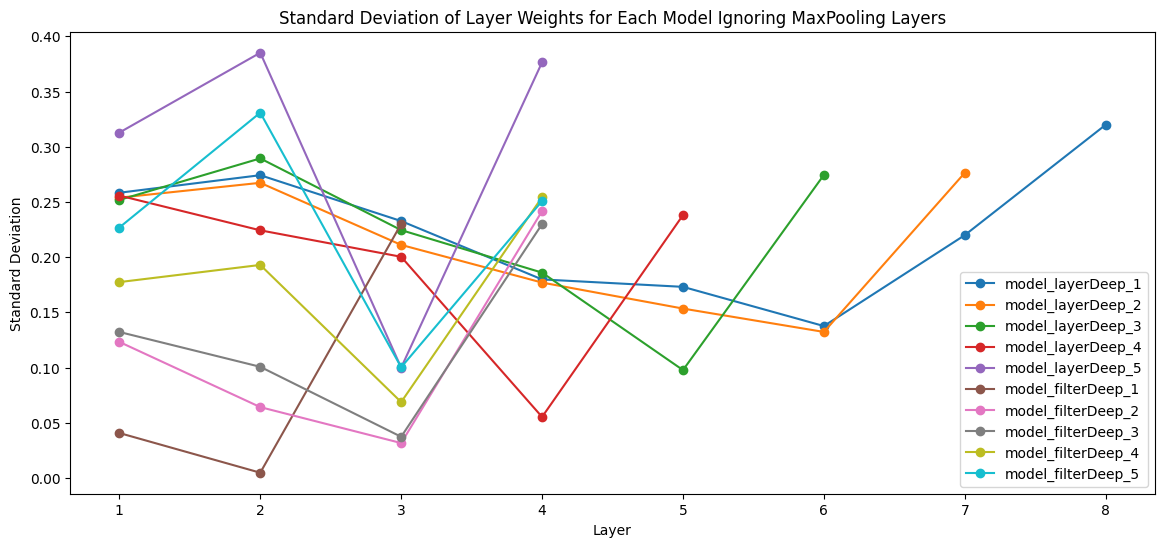

In [ ]:
plt.figure(figsize=(14, 6))

#iterate over the standard deviations for each model
for i, std_devs in enumerate(std_devs_all_models):
    #create a list of layer indices
    layers = range(1, len(std_devs) + 1)

    # plot the standard deviations for the current model
    plt.plot(layers, std_devs, marker='o', label=model_names[i])

plt.title('Standard Deviation of Layer Weights for Each Model Ignoring MaxPooling Layers')
plt.xlabel('Layer')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

model_layerDeep_1 Layer 1 weights cannot be reshaped into (-1, 4)
model_layerDeep_1 Layer 2 does not have weights or biases


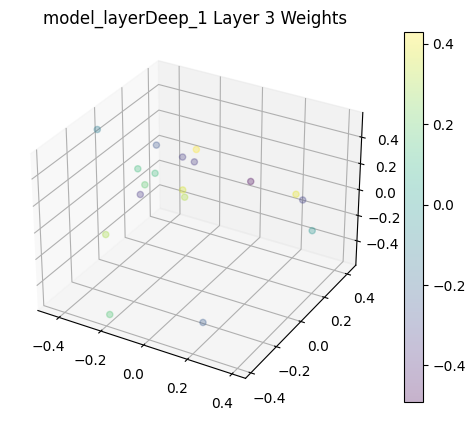

model_layerDeep_1 Layer 4 does not have weights or biases


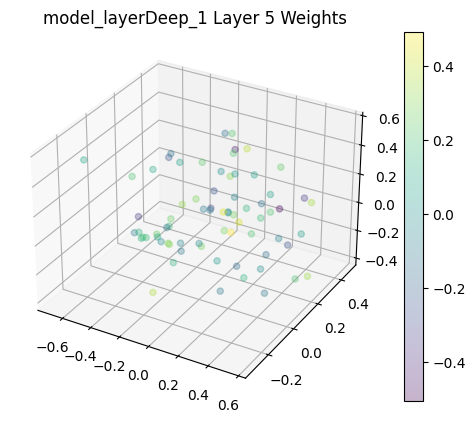

model_layerDeep_1 Layer 6 does not have weights or biases


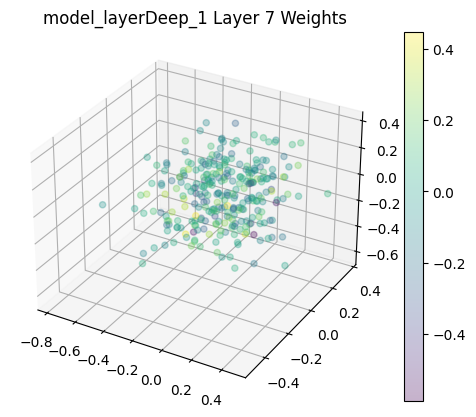

model_layerDeep_1 Layer 8 does not have weights or biases


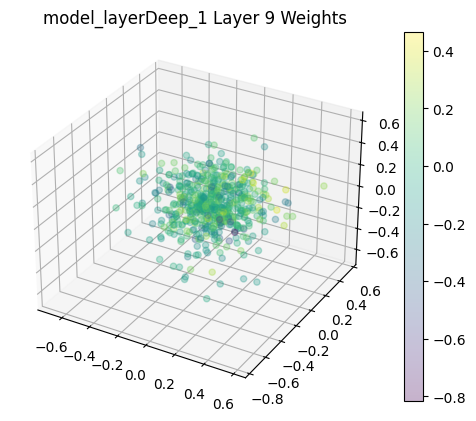

model_layerDeep_1 Layer 10 does not have weights or biases


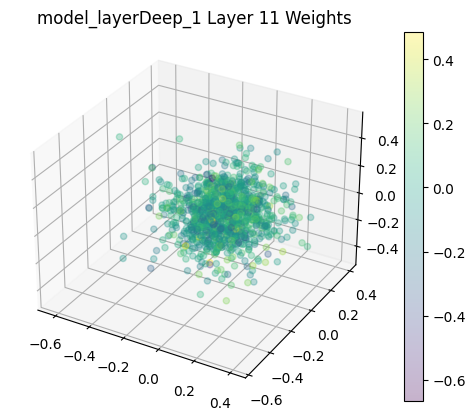

model_layerDeep_1 Layer 12 does not have weights or biases
model_layerDeep_1 Layer 13 does not have weights or biases
model_layerDeep_1 Layer 14 does not have weights or biases
model_layerDeep_1 Layer 15 does not have weights or biases
model_layerDeep_1 Layer 16 does not have weights or biases
model_layerDeep_2 Layer 1 weights cannot be reshaped into (-1, 4)
model_layerDeep_2 Layer 2 does not have weights or biases


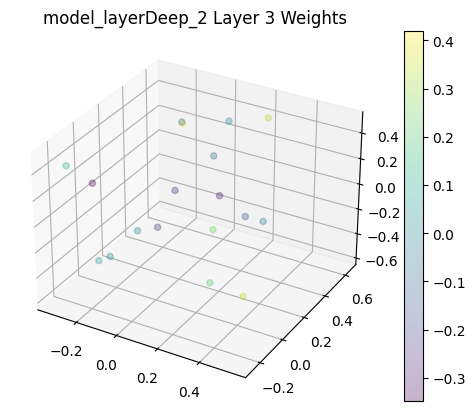

model_layerDeep_2 Layer 4 does not have weights or biases


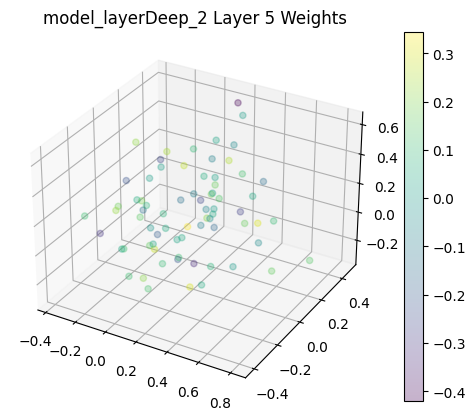

model_layerDeep_2 Layer 6 does not have weights or biases


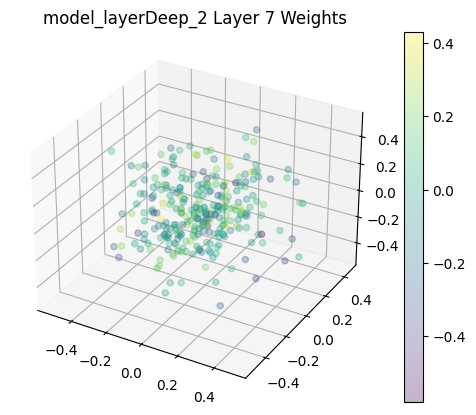

model_layerDeep_2 Layer 8 does not have weights or biases


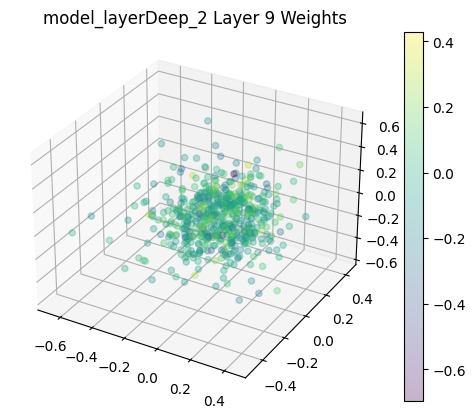

model_layerDeep_2 Layer 10 does not have weights or biases
model_layerDeep_2 Layer 11 does not have weights or biases
model_layerDeep_2 Layer 12 does not have weights or biases
model_layerDeep_2 Layer 13 does not have weights or biases
model_layerDeep_2 Layer 14 does not have weights or biases
model_layerDeep_3 Layer 1 weights cannot be reshaped into (-1, 4)
model_layerDeep_3 Layer 2 does not have weights or biases


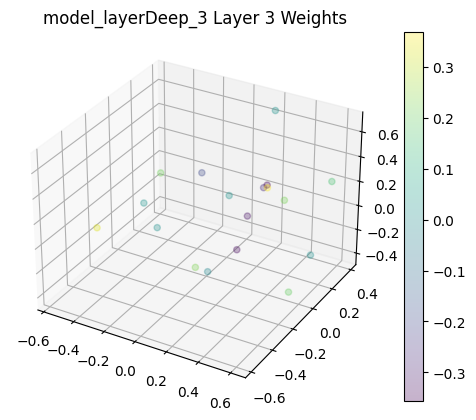

model_layerDeep_3 Layer 4 does not have weights or biases


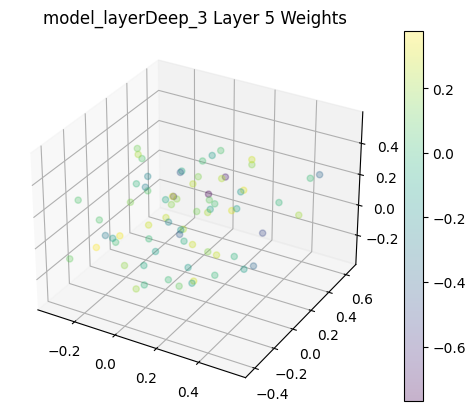

model_layerDeep_3 Layer 6 does not have weights or biases


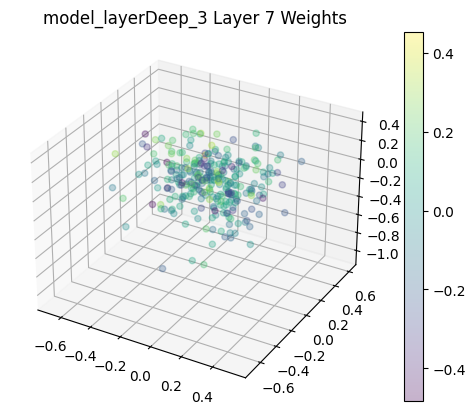

model_layerDeep_3 Layer 8 does not have weights or biases
model_layerDeep_3 Layer 9 does not have weights or biases
model_layerDeep_3 Layer 10 does not have weights or biases
model_layerDeep_3 Layer 11 does not have weights or biases
model_layerDeep_3 Layer 12 does not have weights or biases
model_layerDeep_4 Layer 1 weights cannot be reshaped into (-1, 4)
model_layerDeep_4 Layer 2 does not have weights or biases


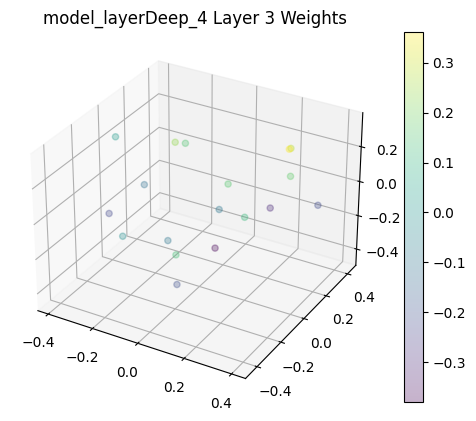

model_layerDeep_4 Layer 4 does not have weights or biases


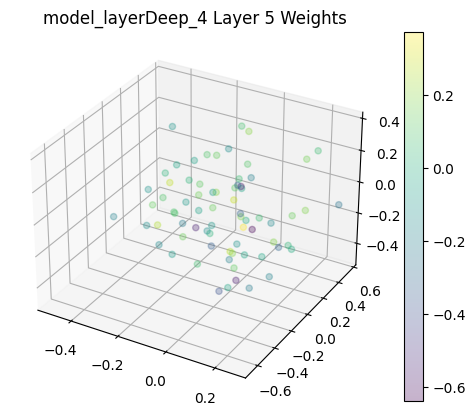

model_layerDeep_4 Layer 6 does not have weights or biases
model_layerDeep_4 Layer 7 does not have weights or biases
model_layerDeep_4 Layer 8 does not have weights or biases
model_layerDeep_4 Layer 9 does not have weights or biases
model_layerDeep_4 Layer 10 does not have weights or biases
model_layerDeep_5 Layer 1 weights cannot be reshaped into (-1, 4)
model_layerDeep_5 Layer 2 does not have weights or biases


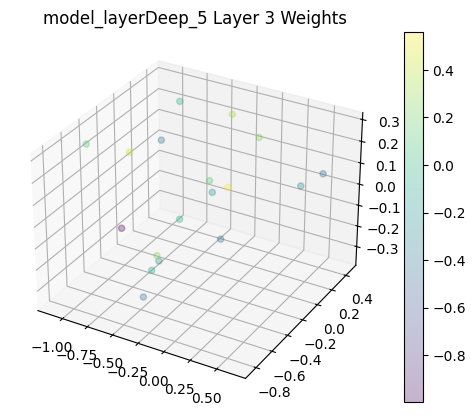

model_layerDeep_5 Layer 4 does not have weights or biases
model_layerDeep_5 Layer 5 does not have weights or biases
model_layerDeep_5 Layer 6 does not have weights or biases
model_layerDeep_5 Layer 7 does not have weights or biases
model_layerDeep_5 Layer 8 does not have weights or biases


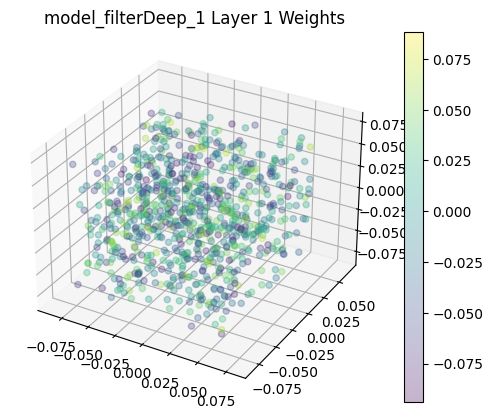

model_filterDeep_1 Layer 2 does not have weights or biases
model_filterDeep_1 Layer 3 does not have weights or biases
model_filterDeep_1 Layer 4 does not have weights or biases
model_filterDeep_1 Layer 5 does not have weights or biases
model_filterDeep_1 Layer 6 does not have weights or biases


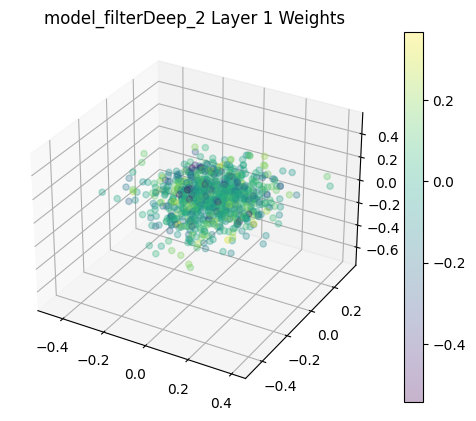

model_filterDeep_2 Layer 2 does not have weights or biases


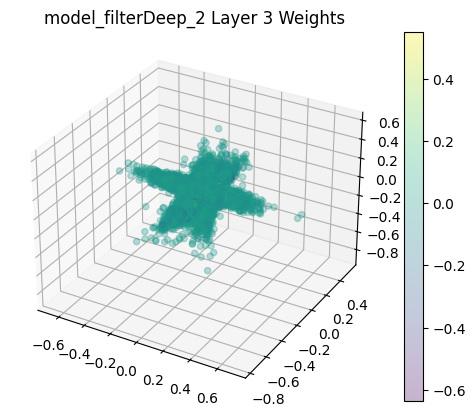

model_filterDeep_2 Layer 4 does not have weights or biases
model_filterDeep_2 Layer 5 does not have weights or biases
model_filterDeep_2 Layer 6 does not have weights or biases
model_filterDeep_2 Layer 7 does not have weights or biases
model_filterDeep_2 Layer 8 does not have weights or biases


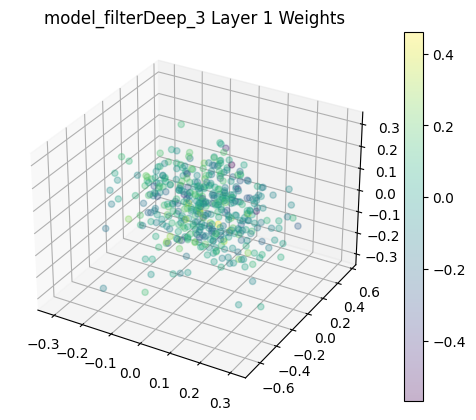

model_filterDeep_3 Layer 2 does not have weights or biases


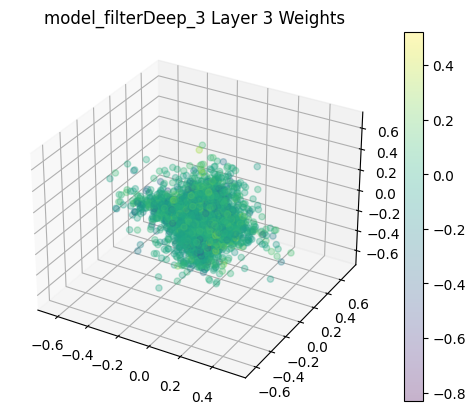

model_filterDeep_3 Layer 4 does not have weights or biases
model_filterDeep_3 Layer 5 does not have weights or biases
model_filterDeep_3 Layer 6 does not have weights or biases
model_filterDeep_3 Layer 7 does not have weights or biases
model_filterDeep_3 Layer 8 does not have weights or biases


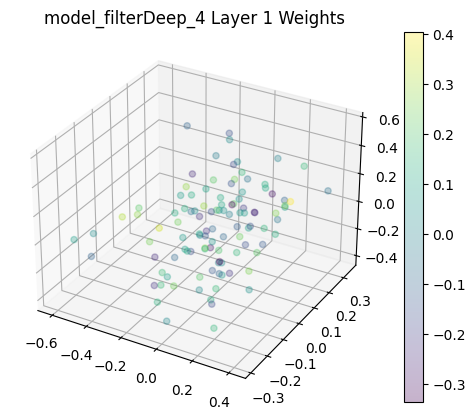

model_filterDeep_4 Layer 2 does not have weights or biases


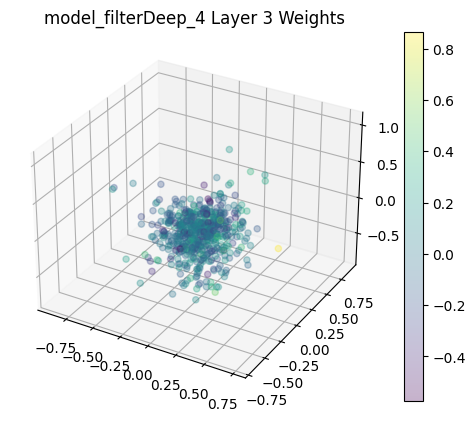

model_filterDeep_4 Layer 4 does not have weights or biases
model_filterDeep_4 Layer 5 does not have weights or biases
model_filterDeep_4 Layer 6 does not have weights or biases
model_filterDeep_4 Layer 7 does not have weights or biases
model_filterDeep_4 Layer 8 does not have weights or biases


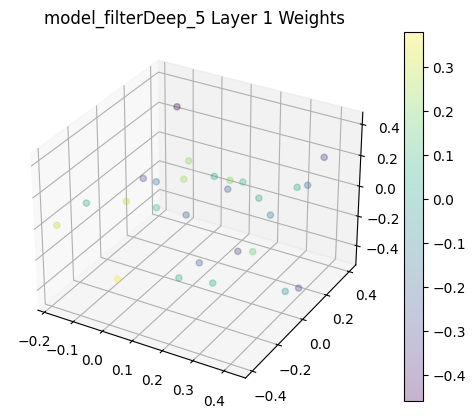

model_filterDeep_5 Layer 2 does not have weights or biases


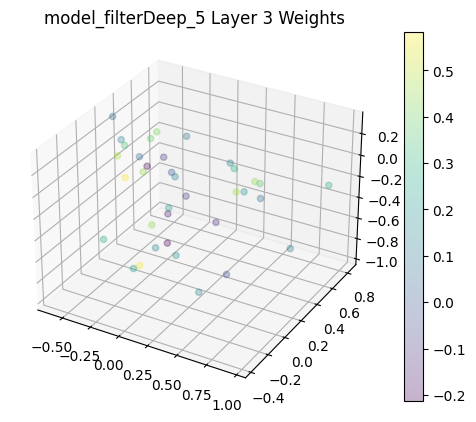

model_filterDeep_5 Layer 4 does not have weights or biases
model_filterDeep_5 Layer 5 does not have weights or biases
model_filterDeep_5 Layer 6 does not have weights or biases
model_filterDeep_5 Layer 7 does not have weights or biases
model_filterDeep_5 Layer 8 does not have weights or biases


In [ ]:
#create a list of model names
model_names = ['model_layerDeep_1', 'model_layerDeep_2', 'model_layerDeep_3', 'model_layerDeep_4','model_layerDeep_5',
               'model_filterDeep_1', 'model_filterDeep_2', 'model_filterDeep_3', 'model_filterDeep_4', 'model_filterDeep_5']

#iterate over each model
for j, model in enumerate(models):
    # get the weights of the model
    model_weights = model.get_weights()

    #iterate over the weights of each layer
    for i, layer_weights in enumerate(model_weights):
        #check if the layer weights have 4 dimensions
        if len(layer_weights.shape) == 4:
            #check if the total number of elements is a multiple of 4
            if np.prod(layer_weights.shape) % 4 == 0:
                #reshape the weights to have 4 dimensions
                reshaped_weights = layer_weights.reshape(-1, 4)

                #create a 3D scatter plot
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')

                #use the first three dimensions for the x, y, and z coordinates
                x = reshaped_weights[:, 0]
                y = reshaped_weights[:, 1]
                z = reshaped_weights[:, 2]

                #use the fourth dimension for the color
                colors = reshaped_weights[:, 3]

                #set opacity with alpha (e.g., alpha=0.3 for semi-transparent)
                sc = ax.scatter(x, y, z, c=colors, alpha=0.3)

                #add a colorbar
                plt.colorbar(sc)

                plt.title(f'{model_names[j]} Layer {i+1} Weights')
                plt.show()
            else:
                print(f"{model_names[j]} Layer {i+1} weights cannot be reshaped into (-1, 4)")
        else:
            print(f"{model_names[j]} Layer {i+1} does not have weights or biases")
